# Introduction

Understanding what contributes to the sale price of a house, can greatly improve the experience of buying a home for both buyers and sellers. Inappropriately pricing a house can lead to negative experiences for sellers, such as underselling, elongated sale cycles, unsuccessful target marketing, and bad investments in low-value features. Alternatively, buyers may overpay for a house, experience trouble with their search criteria, and miss out on buying opportunities due to overpriced homes. 

#### Objective 

To help solve this problem, I've set out to **create a predictive model that gives us the expected sale price**, so that we can better understand what we can do to positively influence house sale prices and create a better home buying experience for buyers and sellers.

For this project, we will analyzing a set of Ames, IA house sales from 2006 - 2010.

To evaluate the performance of my model's ability to predict new data, my predictions were submitted to a [Kaggle Competition](https://www.kaggle.com/c/dsir-720-project-2-regression-challenge/overview), which scored my performance by the Root Mean Squared Error (RMSE). 

### Contents:
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing and Feature Engineering](#Preprocessing-and-Feature-Engineering)
    - [Interaction Terms](#Interaction-Terms)
    - [One-Hot Encoding (Get Dummies)](#One-Hot-Encoding-(Get-Dummies))
    - [Check For Outliers](#Check-For-Outliers)
- [Model Creation](#Model-Creation)
    - [Scale with Standard Scaler](#Scale-with-Standard-Scaler)
    - [Linear Regression](#Linear-Regression)
        - [Linear Regression using Scaled Data](#Linear-Regression-using-Scaled-Data)
- [Model Tuning](#Model-Tuning)
    - [OLS Using Stats](#OLS-Using-Stats)
    - [Regularization](#Regularization)
        - [Elastic Net Regression](#Elastic-Net-Regression)
        - [Elastic Net Regression using Scaled Data](#Elastic-Net-Regression-using-Scaled-Data)
    - [GridSearchCV Parameter Tuning](#GridSearchCV-Parameter-Tuning)
- [Kaggle Submission](#Kaggle-Submission)
    


# Data Import & Cleaning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
import missingno as msno
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV


#source for missingno
#https://github.com/ResidentMario/missingno
#Bilogur, (2018). Missingno: a missing data visualization suite. Journal of Open Source Software, 3(22), 547, https://doi.org/10.21105/joss.00547

## Read in our train & test data

In [2]:
#allow all columns to be seen. 
pd.set_option('display.max_columns', None)

# Source:https://stackoverflow.com/questions/47022070/display-all-dataframe-columns-in-a-jupyter-python-notebook/47022213 

In [3]:
train = pd.read_csv('./datasets/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
test = pd.read_csv('./datasets/test.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
train.shape

(2051, 81)

In [6]:
test.shape #doesn't have saleprice 

(878, 80)

## Clean our training data

In [7]:
#Set the id column to be our new index
train.set_index('Id', inplace = True)
test.set_index('Id', inplace = True)

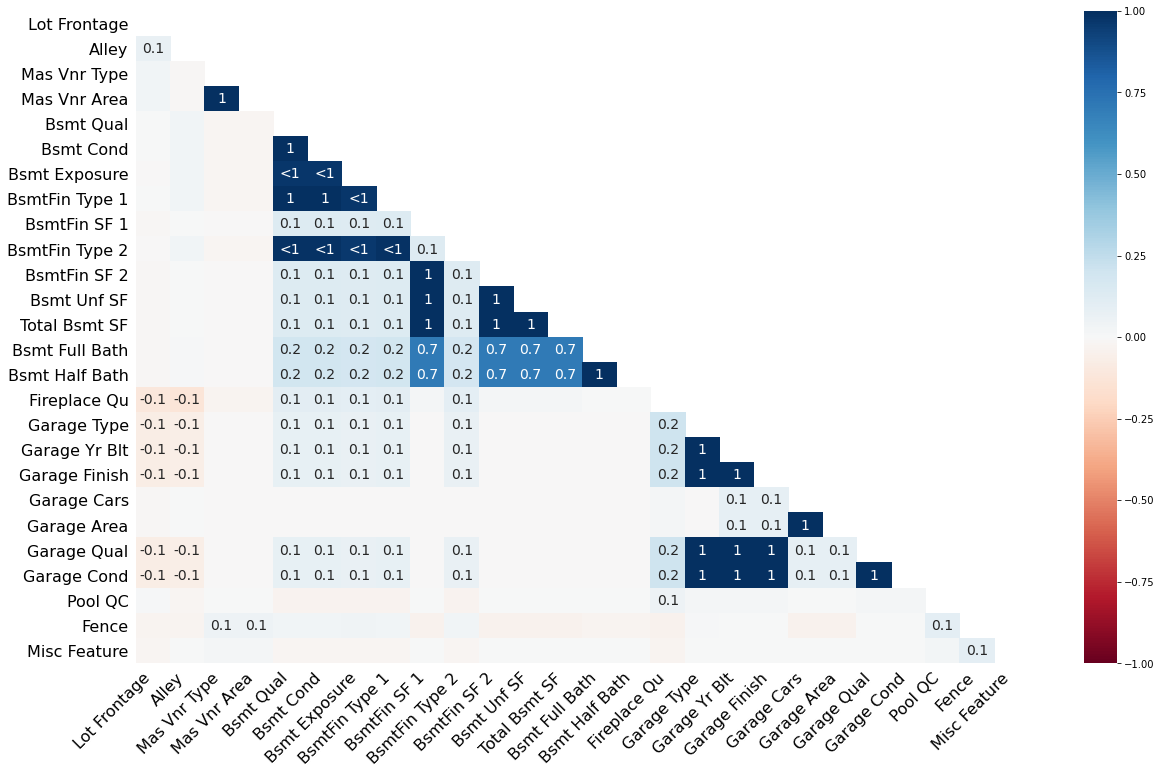

In [8]:
#Let's learn about the relationships of the null values to see how a value in one column might lead to a null in another. 
msno.heatmap(train);

Takeaways:
- Rows that have a Garage Type, will likely also have a Garage Qual, Garage Cond, Garage Finish, and Garage Yr Blt
- Rows that have Bsmt Cond, will likely also have a Bsmt 

Values Explained:
- -1: (if one variable appears the other definitely does not)  
- 0: (variables appearing or not appearing have no effect on one another) 
- 1: (if one variable appears the other definitely also does)

Source: https://github.com/ResidentMario/missingno 

### Check for null values

In [9]:
#code to only show null value counts - https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null 
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum().sort_values(ascending=False)
#there are 2051 rows in the train dataset

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [10]:
train.shape

(2051, 80)

In [11]:
#Get rid of the null rows in that have < 3
train.dropna(subset=['Total Bsmt SF','Garage Area','Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1','Garage Cars','Bsmt Full Bath','Bsmt Half Bath'],inplace=True)

In [12]:
#check my work
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum().sort_values(ascending=False)

Pool QC           2039
Misc Feature      1983
Alley             1908
Fence             1650
Fireplace Qu       998
Lot Frontage       330
Garage Yr Blt      113
Garage Type        113
Garage Finish      113
Garage Qual        113
Garage Cond        113
Bsmt Exposure       56
BsmtFin Type 2      54
BsmtFin Type 1      53
Bsmt Cond           53
Bsmt Qual           53
Mas Vnr Area        22
Mas Vnr Type        22
dtype: int64

## Clean the test data

In [13]:
#See how many null columns exist in this dataset

null_columns=test.columns[test.isnull().any()]
test[null_columns].isnull().sum().sort_values(ascending=False)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 2     25
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Cond          25
Bsmt Qual          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
dtype: int64

In [14]:
#See how many null values exist in the testing set that for the nulls we removed in the training
test[['Total Bsmt SF','Garage Area','Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1','Garage Cars','Bsmt Full Bath','Bsmt Half Bath']].isnull().sum()

Total Bsmt SF     0
Garage Area       0
Bsmt Unf SF       0
BsmtFin SF 2      0
BsmtFin SF 1      0
Garage Cars       0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

# Exploratory Data Analysis

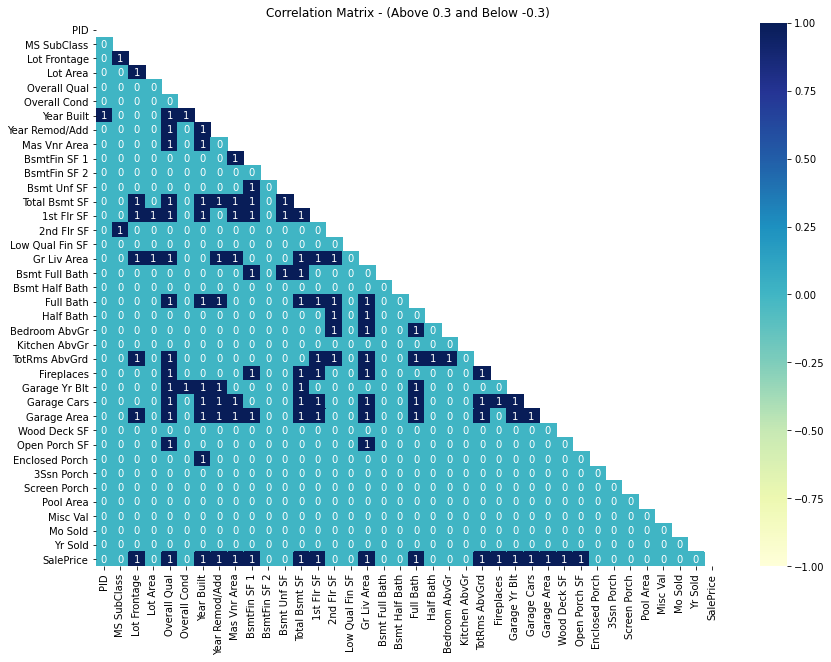

In [15]:
#Let's find the correlations between all fields
corr = ((train.corr() > .3) | (train.corr() < -0.3))  #everything above .3 and below -0.3
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14,10))
plt.title('Correlation Matrix - (Above 0.3 and Below -0.3)')
sns.heatmap(corr, cmap='YlGnBu', annot=True, vmin=-1, vmax=1, mask=mask,);
plt.savefig('./imgs/corr.jpeg',bbox_inches='tight')

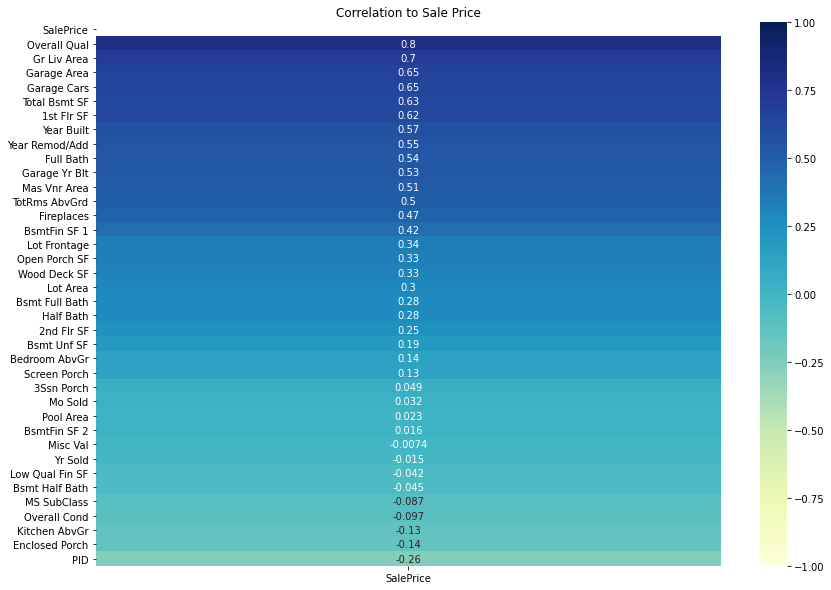

In [16]:
#Let's find the correlations between features and SalePrice
corr = train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True, vmin=-1, vmax=1, mask=mask,);
plt.title('Correlation to Sale Price')
#Most correlated: Overall Quality, Garage Cars, Garage Area, Gr Liv Area
#color palette and code from DSI lesson: https://git.generalassemb.ly/DSIR-720/3.07-lesson-model-workflow 
plt.savefig('./imgs/corr-saleprice.jpeg',bbox_inches='tight')

## Let's see if we can add all positively correlated variables above .3 to help train our model

In [17]:
#Get the variable names and store them in a variable
features = corr[corr['SalePrice'] > .3].index

In [18]:
#remove SalePrice from features
features = features.delete(0)

In [19]:
#Need to examine null values and go back and clean the data in training and test data sets
train[features].isnull().sum()

Overall Qual        0
Gr Liv Area         0
Garage Area         0
Garage Cars         0
Total Bsmt SF       0
1st Flr SF          0
Year Built          0
Year Remod/Add      0
Full Bath           0
Garage Yr Blt     113
Mas Vnr Area       22
TotRms AbvGrd       0
Fireplaces          0
BsmtFin SF 1        0
Lot Frontage      330
Open Porch SF       0
Wood Deck SF        0
dtype: int64

In [20]:
test[features].isnull().sum()

Overall Qual        0
Gr Liv Area         0
Garage Area         0
Garage Cars         0
Total Bsmt SF       0
1st Flr SF          0
Year Built          0
Year Remod/Add      0
Full Bath           0
Garage Yr Blt      45
Mas Vnr Area        1
TotRms AbvGrd       0
Fireplaces          0
BsmtFin SF 1        0
Lot Frontage      160
Open Porch SF       0
Wood Deck SF        0
dtype: int64

In [21]:
#To make it easier, let's exclude Garage Yr Blt and Mas Vnr Area from the features list
#find the indexes of the values
for i,v in enumerate(features):
    print(i,v)

0 Overall Qual
1 Gr Liv Area
2 Garage Area
3 Garage Cars
4 Total Bsmt SF
5 1st Flr SF
6 Year Built
7 Year Remod/Add
8 Full Bath
9 Garage Yr Blt
10 Mas Vnr Area
11 TotRms AbvGrd
12 Fireplaces
13 BsmtFin SF 1
14 Lot Frontage
15 Open Porch SF
16 Wood Deck SF


In [22]:
#remove Garage Yr Blt and Mas Vrn Area and Lot Frontage
features = features.delete([9,10,14])

In [23]:
#check work
train[features].isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Open Porch SF     0
Wood Deck SF      0
dtype: int64

In [24]:
#change features to a list
features = list(features)

In [25]:
train[features].head(3)

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Open Porch SF,Wood Deck SF
Id,,,,,,,,,,,,,,
109,6,1479,475.0,2.0,725.0,725,1976,2005,2,6,0,533.0,44,0
544,7,2122,559.0,2.0,913.0,913,1996,1997,2,8,1,637.0,74,0
153,5,1057,246.0,1.0,1057.0,1057,1953,2007,1,5,0,731.0,52,0


# Exploration Cont.

### How are house prices distributed?

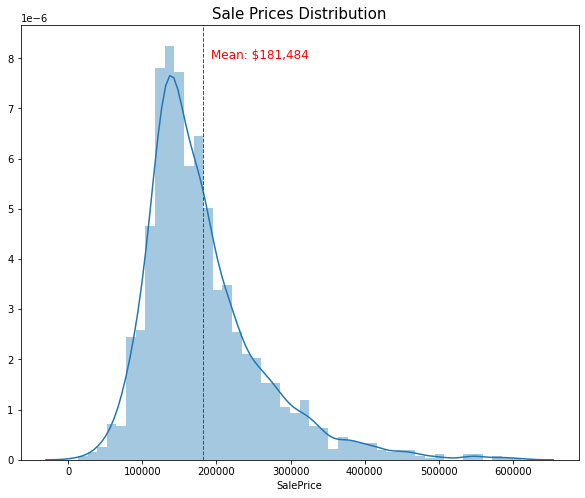

In [26]:
plt.figure(figsize=(10,8))
sns.distplot(train['SalePrice']);
plt.axvline(x=train['SalePrice'].mean(), linewidth=1, color='r',ls='--')
plt.annotate(text='Mean: $181,484',xy=(192900,8e-6),size=12, color='r')
plt.title('Sale Prices Distribution',fontsize=15);
plt.savefig('./imgs/price_dist.jpeg',bbox_inches='tight')

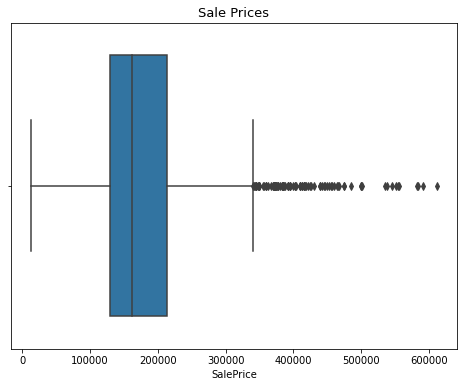

In [27]:
#check for outliers
plt.figure(figsize=(8,6))
sns.boxplot(train['SalePrice']);
plt.title('Sale Prices',fontsize=13);
plt.savefig('./imgs/prices_box.jpeg',bbox_inches='tight')

There are a few values that are very low and a few on the higher end, so we may want to take these out before modeling.

### Are some neighborhoods more expensive than others?

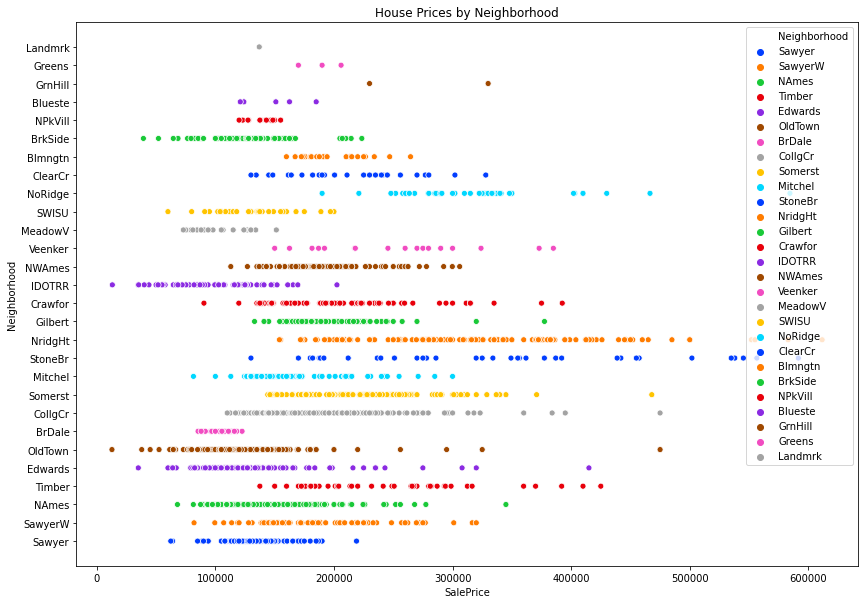

In [28]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='SalePrice',
                y='Neighborhood',
                data=train,
                hue='Neighborhood',
                palette='bright')
plt.title('House Prices by Neighborhood')
plt.tight_layout;
plt.savefig('./imgs/prices_by_neighborhood.jpeg',bbox_inches='tight')

In [29]:
#what are most and least expensive
train.groupby('Neighborhood')['SalePrice'].agg('mean').sort_values()

Neighborhood
MeadowV    100231.250000
IDOTRR     100370.750000
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127663.000000
Edwards    129407.507042
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: SalePrice, dtype: float64

### How does time affect sale price?

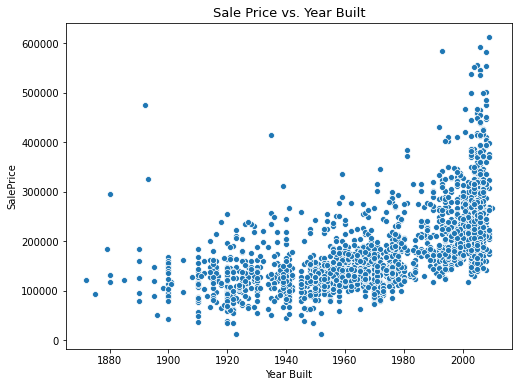

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(train['Year Built'],train['SalePrice']);
plt.title('Sale Price vs. Year Built',fontsize=13);
plt.savefig('./imgs/yr_built_scatter.jpeg',bbox_inches='tight')

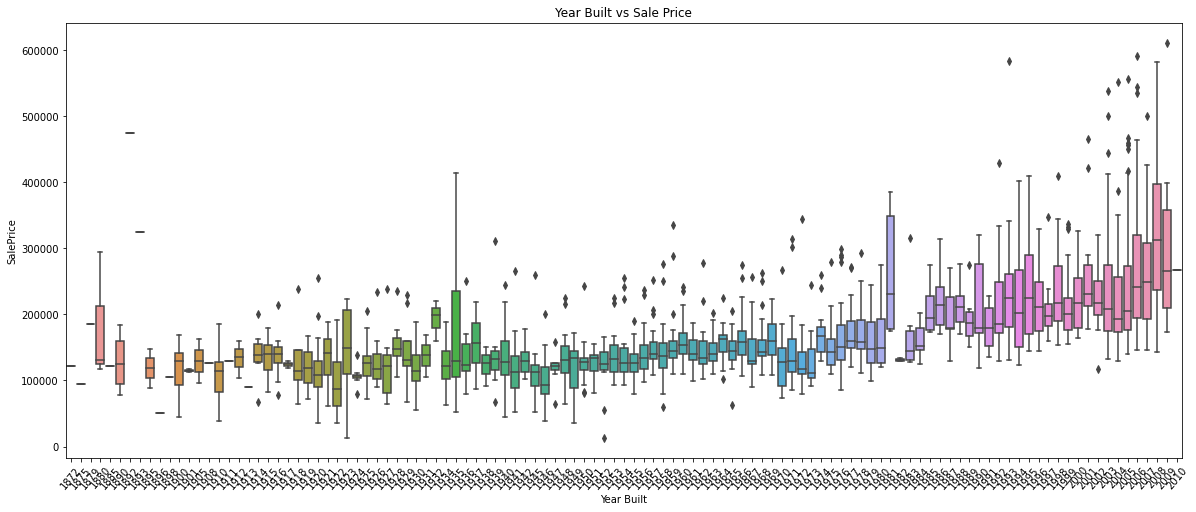

In [31]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x='Year Built', y='SalePrice', data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50) 
plt.title('Year Built vs Sale Price');
plt.savefig('./imgs/yr_built_box.jpeg',bbox_inches='tight');

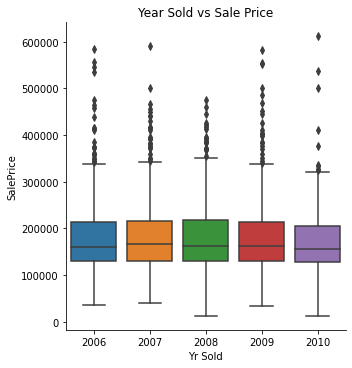

In [32]:
sns.catplot(x='Yr Sold', y='SalePrice', data=train, kind='box')
plt.title('Year Sold vs Sale Price');
plt.savefig('./imgs/yr_sold_box.jpeg',bbox_inches='tight');

# Preprocessing and Feature Engineering

## Interaction Terms

Model didn't like them, so decided to comment out. For future analysis, this would be a good section to create new interaction terms.

In [33]:
#let's first find all the non null values in test and training that we can use. 

In [34]:
# #get all of the numerical features
# num_features = train._get_numeric_data().columns

# #remove SalePrice
# num_features = num_features.delete(-1)
# num_features



In [35]:
# #of these, how many are nulls in our training data?
# #Make into a dataframe - credit: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
# train_num_features = train[num_features].isnull().sum().sort_values(ascending=False).rename_axis('column').reset_index(name='null_values')
# train_num_features

In [36]:
# #of these, how many are nulls in our testing data?
# #Make into a dataframe - credit: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
# test_num_features = test[num_features].isnull().sum().sort_values(ascending=False).rename_axis('column').reset_index(name='null_values')
# test_num_features

In [37]:
# #lets find the variables that don't have any nulls and are in both train/test
# #use an inner join to accomplish this
# potential_interactions = pd.merge(train_num_features[train_num_features['null_values'] == 0], 
#          (test_num_features[test_num_features['null_values'] == 0]),
#          how='inner',
#          on='column',
#          suffixes=('_train','_test'))
# potential_interactions

In [38]:
# train[potential_interactions['column']]

### Let's choose some interaction terms to create

In [39]:
#can make a column showing how old the house is
#would like 'Overall Qual', 'Overall Cond', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Garage Type'

#Overall Cond * Overall Qual
#Lot Area * Gr Liv Area
#TotRms AbvGrd * Bedroom AbvGrd

In [40]:
# #make new columns for training data
# train['interaction_overall'] = train['Overall Cond'] * train['Overall Qual']
# train['interaction_area'] = train['Lot Area'] * train['Gr Liv Area']
# train['interaction_rooms'] = train['TotRms AbvGrd'] * train['Bedroom AbvGr']

# #make new columns for test data
# test['interaction_overall'] = test['Overall Cond'] * test['Overall Qual']
# test['interaction_area'] = test['Lot Area'] * test['Gr Liv Area']
# test['interaction_rooms'] = test['TotRms AbvGrd'] * test['Bedroom AbvGr']

In [41]:
# #create a variable to hold the interaction features
# interaction_features = ['interaction_overall', 'interaction_area','interaction_rooms']

### Create a house 'age' column

In [42]:
# #Let's use 2020 because I'm not sure when this dataset was created. 
# train['house_age'] = 2020 - train['Year Built']
# test['house_age'] = 2020 - test['Year Built']

In [43]:
# features.append('house_age')

### Check work

In [44]:
# #check work

# train.head(2)

In [45]:
# #check work
# test.head(2)

## One-Hot Encoding (Get Dummies)

In [46]:
#what variables can I turn into get_dummies?
cat_features = train.select_dtypes(include='object').columns

In [47]:
#of these, how many are nulls in our training data?
#Make into a dataframe - credit: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
train_cat_features = train[cat_features].isnull().sum().sort_values(ascending=False).rename_axis('column').reset_index(name='null_values')
train_cat_features

,column,null_values
0,Pool QC,2039
1,Misc Feature,1983
2,Alley,1908
3,Fence,1650
4,Fireplace Qu,998
5,Garage Cond,113
6,Garage Qual,113
7,Garage Finish,113
8,Garage Type,113
9,Bsmt Exposure,56


In [48]:
#look at testing data
test_cat_features = test[cat_features].isnull().sum().sort_values(ascending=False).rename_axis('column').reset_index(name='null_values')
test_cat_features

,column,null_values
0,Pool QC,874
1,Misc Feature,837
2,Alley,820
3,Fence,706
4,Fireplace Qu,422
5,Garage Cond,45
6,Garage Qual,45
7,Garage Finish,45
8,Garage Type,44
9,BsmtFin Type 2,25


In [49]:
#lets find the variables that don't have any nulls and are in both train/test
#use an inner join to accomplish this
potential_dummies = pd.merge(train_cat_features[train_cat_features['null_values'] == 0], 
         (test_cat_features[test_cat_features['null_values'] == 0]),
         how='inner',
         on='column',
         suffixes=('_train','_test'))
potential_dummies

,column,null_values_train,null_values_test
0,Condition 1,0,0
1,Neighborhood,0,0
2,Condition 2,0,0
3,Bldg Type,0,0
4,Sale Type,0,0
5,Lot Config,0,0
6,Land Slope,0,0
7,Roof Style,0,0
8,Utilities,0,0
9,Land Contour,0,0


In [50]:
potential_dummies['column']

0      Condition 1
1     Neighborhood
2      Condition 2
3        Bldg Type
4        Sale Type
5       Lot Config
6       Land Slope
7       Roof Style
8        Utilities
9     Land Contour
10       Lot Shape
11          Street
12     House Style
13      Foundation
14       Roof Matl
15    Exterior 1st
16    Exterior 2nd
17      Exter Qual
18      Exter Cond
19         Heating
20      Heating QC
21     Central Air
22    Kitchen Qual
23      Functional
24     Paved Drive
25       MS Zoning
Name: column, dtype: object

### Visualizing Potential Dummy Features

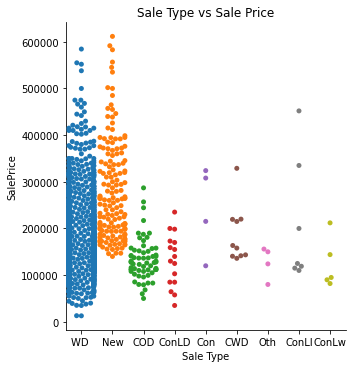

In [51]:
sns.catplot(x='Sale Type', y='SalePrice', data=train, kind='swarm')
plt.title('Sale Type vs Sale Price');
plt.savefig('./imgs/sale_type_cat.jpeg',bbox_inches='tight');

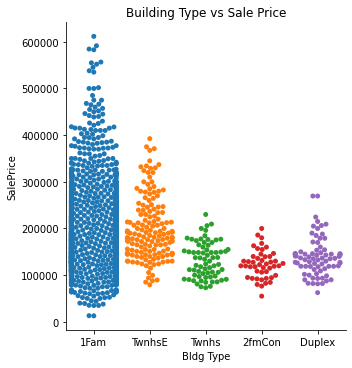

In [52]:
sns.catplot(x='Bldg Type', y='SalePrice', data=train, kind='swarm')
plt.title('Building Type vs Sale Price');
plt.savefig('./imgs/bld_type_cat.jpeg',bbox_inches='tight');

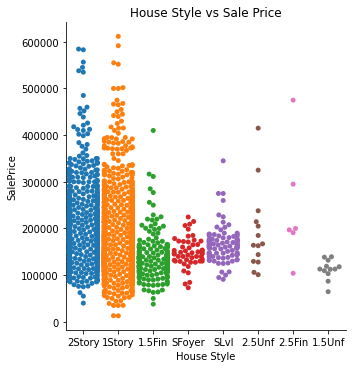

In [53]:
sns.catplot(x='House Style', y='SalePrice', data=train, kind='swarm')
plt.title('House Style vs Sale Price');
plt.savefig('./imgs/house_style.jpeg',bbox_inches='tight');

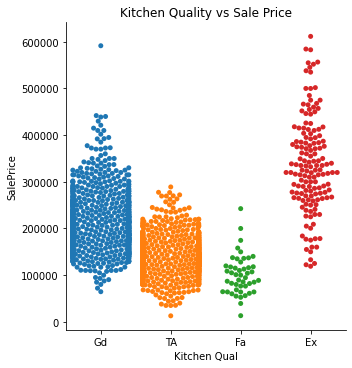

In [54]:
sns.catplot(x='Kitchen Qual', y='SalePrice', data=train, kind='swarm')
plt.title('Kitchen Quality vs Sale Price');
plt.savefig('./imgs/kitch_qual_cat.jpeg',bbox_inches='tight');

In [55]:
#Choose from the above lists which columns we want to use get dummies with

dummy_features = ['Sale Type','MS Zoning','Neighborhood','Bldg Type', 'House Style','Kitchen Qual','Lot Config','Exterior 1st','Exter Qual','Exter Cond']

train[dummy_features]

,Sale Type,MS Zoning,Neighborhood,Bldg Type,House Style,Kitchen Qual,Lot Config,Exterior 1st,Exter Qual,Exter Cond
Id,,,,,,,,,,
109,WD,RL,Sawyer,1Fam,2Story,Gd,CulDSac,HdBoard,Gd,TA
544,WD,RL,SawyerW,1Fam,2Story,Gd,CulDSac,VinylSd,Gd,TA
153,WD,RL,NAmes,1Fam,1Story,Gd,Inside,VinylSd,TA,Gd
318,WD,RL,Timber,1Fam,2Story,TA,Inside,VinylSd,TA,TA
255,WD,RL,SawyerW,1Fam,1.5Fin,TA,Inside,Wd Sdng,TA,TA
...,...,...,...,...,...,...,...,...,...,...
1587,WD,RL,Timber,1Fam,1Story,Gd,Inside,VinylSd,Gd,TA
785,WD,RL,Edwards,1Fam,1Story,TA,Inside,VinylSd,TA,TA
916,WD,RL,Crawfor,1Fam,1.5Fin,TA,Inside,BrkFace,TA,TA


In [56]:
train.shape

(2048, 80)

In [57]:
test.shape

(878, 79)

### Create the dummy columns, don't drop first because we can do this manually so that test and train data have the same columns

In [58]:

train_dummies = pd.get_dummies(data=train[dummy_features], drop_first=False)
train_dummies.head(3)

,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
544,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
153,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [59]:
train_dummies.shape

(2048, 90)

### Do the same for the test dataset

In [60]:
#Create the dummy columns
test_dummies = pd.get_dummies(data=test[dummy_features], drop_first=False)
test_dummies.head(3)

,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2718,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2414,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [61]:
test_dummies.shape

(878, 87)

In [62]:
#problem here because test has a different number of columns than train. 
#these are the columns that are in train, but not test
add_to_test_dummies = list(set(list(train_dummies.columns)) - set(list(test_dummies.columns)))

In [63]:
add_to_test_dummies

['Exterior 1st_ImStucc',
 'Exterior 1st_CBlock',
 'MS Zoning_A (agr)',
 'Exterior 1st_Stone',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk']

In [64]:
#Let's add these to the test data set with a value of 0. This should keep the integrity of get_dummies bc the value was not in the dataset (False), so it will be 0. 
#This is why we didn't drop the first value so that we match up our columns between train and test dfs
for col in add_to_test_dummies:
    test_dummies[col] = 0


In [65]:
test_dummies.shape

(878, 93)

In [66]:
#check work
list(set(list(train_dummies.columns)) - set(list(test_dummies.columns)))

[]

In [67]:
#these are the columns that are in test, but not train
list(set(list(test_dummies.columns)) - set(list(train_dummies.columns)))

['Exterior 1st_PreCast', 'Kitchen Qual_Po', 'Sale Type_VWD']

In [68]:
#drop a column from each dummy
train_dummies.columns

Index(['Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD',
       'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth',
       'Sale Type_WD ', 'MS Zoning_A (agr)', 'MS Zoning_C (all)',
       'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL',
       'MS Zoning_RM', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       '

In [69]:
#drop 1 column from each category in train_dummies
train_dummies.drop(columns=['Sale Type_COD',
                           'MS Zoning_A (agr)',
                           'Neighborhood_Blmngtn',
                           'Bldg Type_1Fam',
                           'House Style_1.5Fin',
                           'Kitchen Qual_Ex',
                           'Lot Config_Corner',
                           'Exterior 1st_AsbShng',
                           'Exter Qual_Ex',
                           'Exter Cond_Ex'
                          ], inplace=True)

In [70]:
#drop 1 column from each category in test_dummies
test_dummies.drop(columns=['Sale Type_COD',
                           'MS Zoning_A (agr)',
                           'Neighborhood_Blmngtn',
                           'Bldg Type_1Fam',
                           'House Style_1.5Fin',
                           'Kitchen Qual_Ex',
                           'Lot Config_Corner',
                           'Exterior 1st_AsbShng',
                           'Exter Qual_Ex',
                           'Exter Cond_Ex'
                          ], inplace=True)

In [71]:
# Merge dummies with the training data
train = pd.merge(train,
         train_dummies,
         how='left',
         right_index=True,
         left_index=True)

In [72]:
#Merge dummies with the test data
test = pd.merge(test,
         test_dummies,
         how='left',
         right_index=True,
         left_index=True)

In [73]:
train_dummies.shape

(2048, 80)

In [74]:
test_dummies.shape

(878, 83)

# Check For Outliers

### Let's keep the rows with sale prices that fall within the 0.1 and 98th percentile

In [75]:
train = train[(train['SalePrice'] < np.percentile(train['SalePrice'],q=98.0)) & (train['SalePrice'] > np.percentile(train['SalePrice'],q=0.1))]
print(np.percentile(train['SalePrice'],q=98.0))
print(np.percentile(train['SalePrice'],q=0.1))

350000.0
37901.4


### Show histograms of all numerical columns

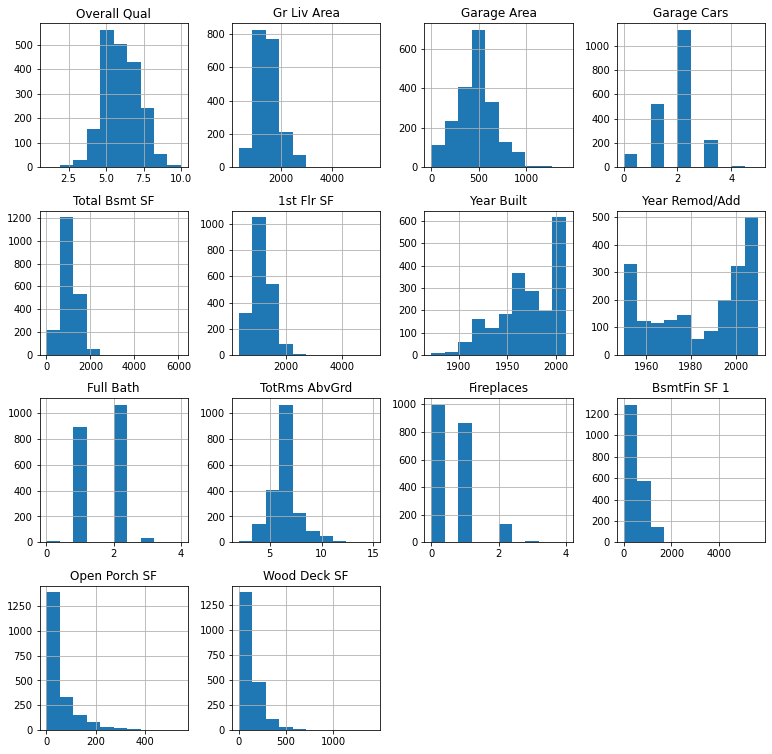

In [76]:
train[features].hist(figsize=(13,13))
plt.tight_layout;
plt.savefig('./imgs/hists.jpeg',bbox_inches='tight')

### Boxplots to find other outliers

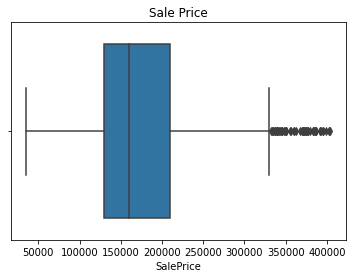

In [77]:
sns.boxplot(train['SalePrice']);
plt.title('Sale Price');
plt.savefig('./imgs/sale_price_box.jpeg',bbox_inches='tight')

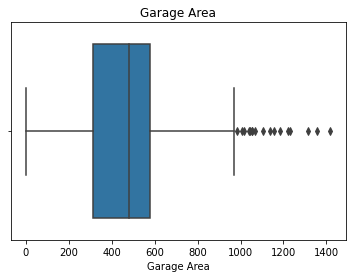

In [78]:
sns.boxplot(train['Garage Area']);
plt.title('Garage Area');
plt.savefig('./imgs/garage_area.jpeg',bbox_inches='tight')

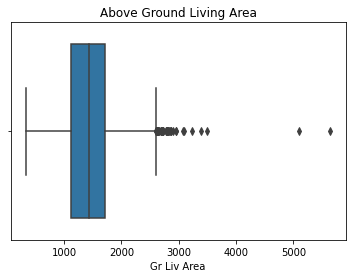

In [79]:
sns.boxplot(train['Gr Liv Area']);
plt.title('Above Ground Living Area');
plt.savefig('./imgs/abv_gr_box.jpeg',bbox_inches='tight')

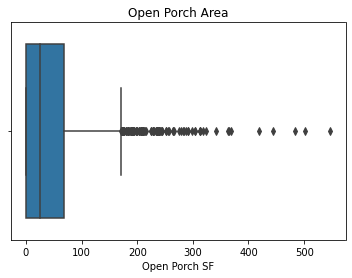

In [80]:
sns.boxplot(train['Open Porch SF']);
plt.title('Open Porch Area');
plt.savefig('./imgs/open_porch_box.jpeg',bbox_inches='tight')

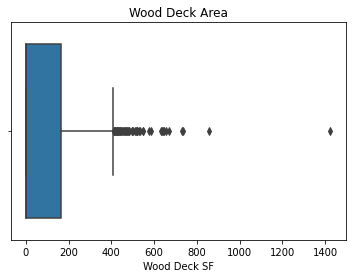

In [81]:
sns.boxplot(train['Wood Deck SF']);
plt.title('Wood Deck Area');
plt.savefig('./imgs/wood_deck_box.jpeg',bbox_inches='tight')

## Removing Outliers

In [82]:
#Remove 2 outliers from 'Gr Liv Area'
train = train[train['Gr Liv Area'] < 4000] 

In [83]:
#Remove outlier from Wood Deck SF
train = train[train['Wood Deck SF'] < 1200]

# Model Creation

# Getting our model ready

In [84]:
#add the dummies to features to easily select
all_features = features
all_features.extend(train_dummies.columns)
# all_features.extend(interaction_features)

In [85]:
#Define X and y
X = train[all_features]
y = train['SalePrice']

In [86]:
#stats models need this added, so add it as a separate variable to not interfere with the other linreg model
X_stat = sm.add_constant(X)

### (Optional) - Drop Features

In [87]:
#Can use if want to drop some features that didn't have ideal p-values or coef_ 
# X.drop(columns=['Garage Cars','Fireplaces'],inplace=True)

In [88]:
#Use this when lining up the test data if want to drop any values
# features_with_drop = list(X.columns)

### Train Test Split

In [89]:
## Train Test Split our model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [90]:
## Take a look at the shapes of X_train and X_test
print(X_train.shape)

print(X_test.shape)

(1499, 94)
(500, 94)


### Baseline model

In [91]:
## Establish a baseline model for comparison
### We can think of our baseline model as a naive model that always
### predicts the mean of our target
y_train_baseline = [y_train.mean()]*len(y_train)        ## multiplying a list by an integer duplicates the elements of that list that many times.
y_test_baseline  = [y_train.mean()]*len(y_test)

In [92]:
## Calculate the RMSE for the baseline train and test "predictions"
print(f"Baseline RMSE - Train: {metrics.mean_squared_error(y_train, y_train_baseline, squared=False)}")
print(f"Baseline RMSE - Test: {metrics.mean_squared_error(y_test, y_test_baseline, squared=False)}")

Baseline RMSE - Train: 66810.43005074812
Baseline RMSE - Test: 66802.25973683123


# Scale with Standard Scaler

In [93]:
# Instantiate.
sc = StandardScaler()

# Fit and transform.
Z_train = sc.fit_transform(X_train)

# Transform.
Z_test = sc.transform(X_test)

# Linear Regression

In [94]:
## Instantiate and fit a linear regression model for my training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [95]:
## Evaluate model on both training and testing data using RMSE
print(f"Train RMSE: {metrics.mean_squared_error(y_train, lr.predict(X_train),squared=False)}")
print(f"Test RMSE: {metrics.mean_squared_error(y_test, lr.predict(X_test),squared=False)}")

Train RMSE: 19127.630185506798
Test RMSE: 23003.641327101668


In [96]:
#let's see how the model performs with cross_val_score
cross_val_score(lr, X, y)

array([0.88259157, 0.9107817 , 0.89991247, 0.90126072, 0.90005811])

In [97]:
cross_val_score(lr, X, y).mean()

0.8989209162833898

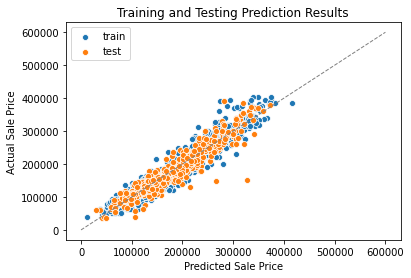

In [98]:
#see it visually
sns.scatterplot(lr.predict(X_train),y_train,label='train')
sns.scatterplot(lr.predict(X_test),y_test,label='test')
plt.plot([0, 600_000], [0, 600_000], color = 'gray', linewidth = 1,linestyle='--') #show what a perfect prediction would have been
plt.title('Training and Testing Prediction Results')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.legend();
plt.savefig('./imgs/lr_results.jpeg',bbox_inches='tight')

# Linear Regression using Scaled Data

In [99]:
## Instantiate and fit a linear regression model for my training data
lr_sc = LinearRegression()
lr_sc.fit(Z_train, y_train)

LinearRegression()

In [100]:
## Evaluate model on both training and testing data using RMSE
print(f"Train RMSE: {metrics.mean_squared_error(y_train, lr_sc.predict(Z_train),squared=False)}")
print(f"Test RMSE: {metrics.mean_squared_error(y_test, lr_sc.predict(Z_test),squared=False)}")

Train RMSE: 19127.6301855068
Test RMSE: 23003.641327100933


In [101]:
#let's see how the model performs with cross_val_score
cross_val_score(lr_sc, X, y)

array([0.88259157, 0.9107817 , 0.89991247, 0.90126072, 0.90005811])

In [102]:
cross_val_score(lr_sc, X, y).mean()

0.8989209162833898

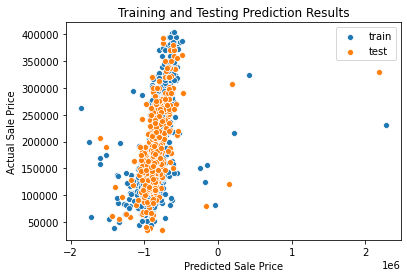

In [103]:
#see it visually
sns.scatterplot(lr.predict(Z_train),y_train,label='train')
sns.scatterplot(lr.predict(Z_test),y_test,label='test')
#plt.plot([0, 600_000], [0, 600_000], color = 'gray', linewidth = 1,linestyle='--') #show what a perfect prediction would have been
plt.title('Training and Testing Prediction Results')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.legend();
plt.savefig('./imgs/lr_results_sc.jpeg',bbox_inches='tight')

# Model Tuning

# OLS Using Stats

In [104]:
model = sm.OLS(y, X_stat).fit() #ordinary least squares is same a linear regression, takes y then X

In [105]:
#Values to remove from train and test based on p-values
# ['Garage Area','1st Flr SF','Year Remod/Add','Full Bath','TotRms AbvGrd','interaction_rooms']

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:41:33   Log-Likelihood:                -22615.
No. Observations:                1999   AIC:                         4.542e+04
Df Residuals:                    1904   BIC:                         4.595e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.934e+05   1.05e+05     -8.492      0.000    -1.1e+06   -6.87e+05
Overall Qual          9862.9704    668.570     14.752      0.000    8551.764    1.12e+04
Gr Liv Area             49.1805      3.580     13.736      0.000      42.159      56.202
Garage Area             11.6995      5.569      2.101      0.036       0.777      22.622
Garage Cars           4733.8577   1572.721      3.010      0.003    1649.421    7818.295
Total Bsmt SF           12.0593      2.179      5.535      0.000       7.786      16.332
1st Flr SF               1.8505      4.081      0.453      0.650      -6.153       9.854
Year Built             260.5674     40.693      6.403      0.000     180.760     340.375
Year Remod/Add         232.0502     35.289      6.576      0.000     162.841     301.260
Full Bath            -1302.9083   1345.479     -0.968      0.333   -3941.677    1335.860
TotRms AbvGrd        -1682.9598    597.873     -2.815      0.005   -2855.515    -510.404
Fireplaces            5095.5877    952.052      5.352      0.000    3228.414    6962.762
BsmtFin SF 1            22.4339      1.373     16.345      0.000      19.742      25.126
Open Porch SF           25.4746      8.097      3.146      0.002       9.595      41.354
Wood Deck SF            18.6042      4.162      4.470      0.000      10.441      26.767
Sale Type_CWD         1.549e+04   7064.408      2.193      0.028    1639.011    2.93e+04
Sale Type_Con         4.302e+04   1.07e+04      4.027      0.000    2.21e+04     6.4e+04
Sale Type_ConLD       1.325e+04   6016.582      2.202      0.028    1451.091    2.51e+04
Sale Type_ConLI       -873.2968   8859.780     -0.099      0.921   -1.82e+04    1.65e+04
Sale Type_ConLw       9684.5734   9613.268      1.007      0.314   -9169.071    2.85e+04
Sale Type_New         1.952e+04   3417.413      5.713      0.000    1.28e+04    2.62e+04
Sale Type_Oth         2.509e+04   1.06e+04      2.362      0.018    4258.942    4.59e+04
Sale Type_WD          8862.7571   2720.211      3.258      0.001    3527.851    1.42e+04
MS Zoning_C (all)    -1.492e+04   3.11e+04     -0.480      0.631   -7.58e+04     4.6e+04
MS Zoning_FV         -2090.6210   3.05e+04     -0.068      0.945    -6.2e+04    5.78e+04
MS Zoning_I (all)     6326.1536   3.76e+04      0.168      0.866   -6.75e+04    8.01e+04
MS Zoning_RH         -1349.0985   3.09e+04     -0.044      0.965    -6.2e+04    5.93e+04
MS Zoning_RL         -4176.1248   3.02e+04     -0.138      0.890   -6.34e+04     5.5e+04
MS Zoning_RM         -1.042e+04   3.05e+04     -0.342      0.733   -7.02e+04    4.94e+04
Neighborhood_Blueste  4881.2680   1.01e+04      0.483      0.629   -1.49e+04    2.47e+04
Neighborhood_BrDale   1.185e+04   7994.172      1.482      0.139   -3830.808    2.75e+04
Neighborhood_BrkSide -2748.4261   6446.384     -0.426    

# Regularization

### Elastic Net Regression

In [107]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.01, 1.0, 100) #trying 100 values evenly spaced between 0.01 and .99

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

#closer to 0, the more ridge we get - lower importance of bad features
#closer to 1, the more lasso we get - gets rid of bad features

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5) #tol=0.000001

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

#Credit: DSI Regularization Lesson - https://git.generalassemb.ly/DSIR-720/4.02-lesson-regularization/blob/master/solution-code/solution-code.ipynb 

0.9129245976562024
0.8818929586661854


In [108]:
cross_val_score(enet_model, X, y)

array([0.87955138, 0.90015916, 0.89752128, 0.90481643, 0.90406805])

In [109]:
cross_val_score(enet_model, X, y).mean()

0.8972232611308646

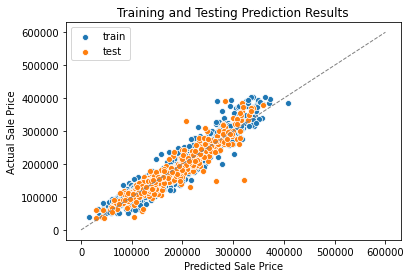

In [110]:
#see it visually
sns.scatterplot(enet_model_preds_train,y_train,label='train')
sns.scatterplot(enet_model_preds,y_test,label='test')
plt.plot([0, 600_000], [0, 600_000], color = 'gray', linewidth = 1,linestyle='--') #show what a perfect prediction would have been
plt.title('Training and Testing Prediction Results')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.legend();
plt.savefig('./imgs/enet_results.jpeg',bbox_inches='tight')

### Elastic Net Regression using Scaled Data

In [111]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.01, 1.0, 100) #trying 100 values evenly spaced between 0.01 and .99

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

#closer to 0, the more ridge we get - lower importance of bad features
#closer to 1, the more lasso we get - gets rid of bad features

# Instantiate model.
enet_model_sc = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5) 

# Fit model using optimal alpha.
enet_model_sc = enet_model_sc.fit(Z_train, y_train)

# Generate predictions.
enet_model_sc_preds = enet_model_sc.predict(Z_test)
enet_model_sc_preds_train = enet_model_sc.predict(Z_train)

# Evaluate model.
print(enet_model_sc.score(Z_train, y_train))
print(enet_model_sc.score(Z_test, y_test))

#Credit: DSI Regularization Lesson - https://git.generalassemb.ly/DSIR-720/4.02-lesson-regularization/blob/master/solution-code/solution-code.ipynb 

0.9178599941623217
0.8833326064739588


In [112]:
#Get a cross val score
cross_val_score(enet_model_sc, X, y)

array([0.87955138, 0.90015916, 0.89752128, 0.90481643, 0.90406805])

In [113]:
#Get avg cross val score
cross_val_score(enet_model_sc, X, y).mean()

0.8972232611308646

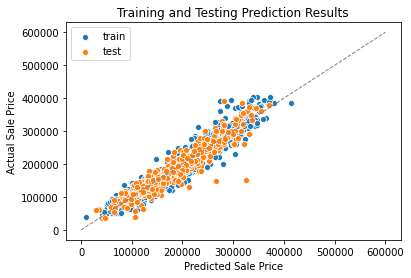

In [114]:
#see it visually
sns.scatterplot(enet_model_sc_preds_train,y_train,label='train')
sns.scatterplot(enet_model_sc_preds,y_test,label='test')
plt.plot([0, 600_000], [0, 600_000], color = 'gray', linewidth = 1,linestyle='--') #show what a perfect prediction would have been
plt.title('Training and Testing Prediction Results')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.legend();
plt.savefig('./imgs/enet_results_sc.jpeg',bbox_inches='tight')

# GridSearchCV Parameter Tuning

In [115]:
#See params for model
ElasticNetCV.get_params(enet_model_sc)

{'alphas': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
        0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
        0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
        0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
        0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
        0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
        0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
        0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
        1.  ]),
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': False,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [116]:
np.linspace(0.1, 1.0, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [117]:
# Create dictionary of hyperparameters.
# The keys MUST match the names of the arguments!
enet_params = {'l1_ratio': np.linspace(0.1, 1.0, 10),}

In [118]:
# Instantiate our GridSearchCV object.
enet_gridsearch = GridSearchCV(estimator=ElasticNetCV(), # What is the model we want to fit?
                              param_grid=enet_params, # What is the dictionary of hyperparameters?
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

In [119]:
enet_gridsearch

GridSearchCV(cv=5, estimator=ElasticNetCV(),
             param_grid={'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             verbose=1)

In [120]:
# Fit the GridSearchCV object to the data
enet_gridsearch.fit(Z_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.1s finished


In [121]:
pd.DataFrame(enet_gridsearch.cv_results_).sort_values('rank_test_score').head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.219803,0.004563,0.000913,0.000137,1,{'l1_ratio': 1.0},0.890647,0.911821,0.898785,0.892075,0.902051,0.899076,0.007634,1
8,0.131197,0.003082,0.000855,0.000116,0.9,{'l1_ratio': 0.9},0.655300,0.677414,0.693460,0.714894,0.679608,0.684135,0.019648,2
7,0.132960,0.004276,0.000886,0.000196,0.8,{'l1_ratio': 0.8},0.485863,0.503340,0.516634,0.534568,0.503594,0.508800,0.016176,3
6,0.131286,0.002332,0.000864,0.000103,0.7,{'l1_ratio': 0.7000000000000001},0.361119,0.375369,0.384332,0.394152,0.374339,0.377862,0.011011,4
5,0.131598,0.003498,0.000949,0.000140,0.6,{'l1_ratio': 0.6},0.267606,0.279431,0.285084,0.286937,0.277857,0.279383,0.006791,5
4,0.129002,0.001443,0.000869,0.000109,0.5,{'l1_ratio': 0.5},0.195545,0.205471,0.208747,0.203678,0.203779,0.203444,0.004354,6
3,0.126091,0.001456,0.000794,0.000068,0.4,{'l1_ratio': 0.4},0.138550,0.146946,0.148516,0.137580,0.145359,0.143390,0.004472,7


# Kaggle Submission

In [122]:
#get the testing data to just our features
X_kaggle = test.loc[:,all_features] # use features_with_drop if dropped any columns above

In [123]:
#need to scale down X_kaggle data
X_kaggle = sc.transform(X_kaggle)

#### Specify below which model you want to use to create your predictions. In the case below, we are using our best model, the Elastic Net Regression with the Scaled data.

In [124]:
##USE ELASTIC Net & Scaled
## Then we use the same model to predict on the test data, save predictions to a `SalePrice` column
submission_preds = enet_model_sc.predict(X_kaggle)

In [125]:
#Create the dataframe
output = pd.DataFrame({'Id': test.index, 'SalePrice': submission_preds})

In [126]:
output.head()

,Id,SalePrice
0,2658,124132.705227
1,2718,164596.731365
2,2414,207824.895405
3,1989,110579.033419
4,625,174110.999430


In [127]:
output.shape

(878, 2)

# Save submission to a .csv

In [128]:
## Save output to a csv
output.to_csv('./datasets/my_submission.csv',index=False)